# IMPORTING NECESSARY LIBRARIES

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('temperature.csv') #loading our dataset

In [3]:
df.head()# checking the top 5 rows

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.shape 

(7752, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7750.0,13.000000,7.211568,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7682.0,29.768211,2.969999,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7682.0,23.225059,2.413961,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7677.0,56.759372,14.668111,19.794666,45.963543,55.039024,67.190056,98.524734
LDAPS_RHmax,7677.0,88.374804,7.192004,58.936283,84.222862,89.793480,93.743629,100.000153
LDAPS_Tmax_lapse,7677.0,29.613447,2.947191,17.624954,27.673499,29.703426,31.710450,38.542255
LDAPS_Tmin_lapse,7677.0,23.512589,2.345347,14.272646,22.089739,23.760199,25.152909,29.619342
LDAPS_WS,7677.0,7.097875,2.183836,2.882580,5.678705,6.547470,8.032276,21.857621
LDAPS_LH,7677.0,62.505019,33.730589,-13.603212,37.266753,56.865482,84.223616,213.414006
LDAPS_CC1,7677.0,0.368774,0.262458,0.000000,0.146654,0.315697,0.575489,0.967277


In [7]:
df.isnull().sum() 

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

# DATA PRE PROCESSING

In [8]:
df["station"] = df["station"].fillna(method="ffill")
df["Date"] = df["Date"].fillna(method="ffill")

In [9]:
for i in df.columns:
    if i not in ['station', 'Date']:
        df[i] = df[i].replace(np.nan, df[i].median())
    

In [10]:
df.isnull().sum().sum()


0

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


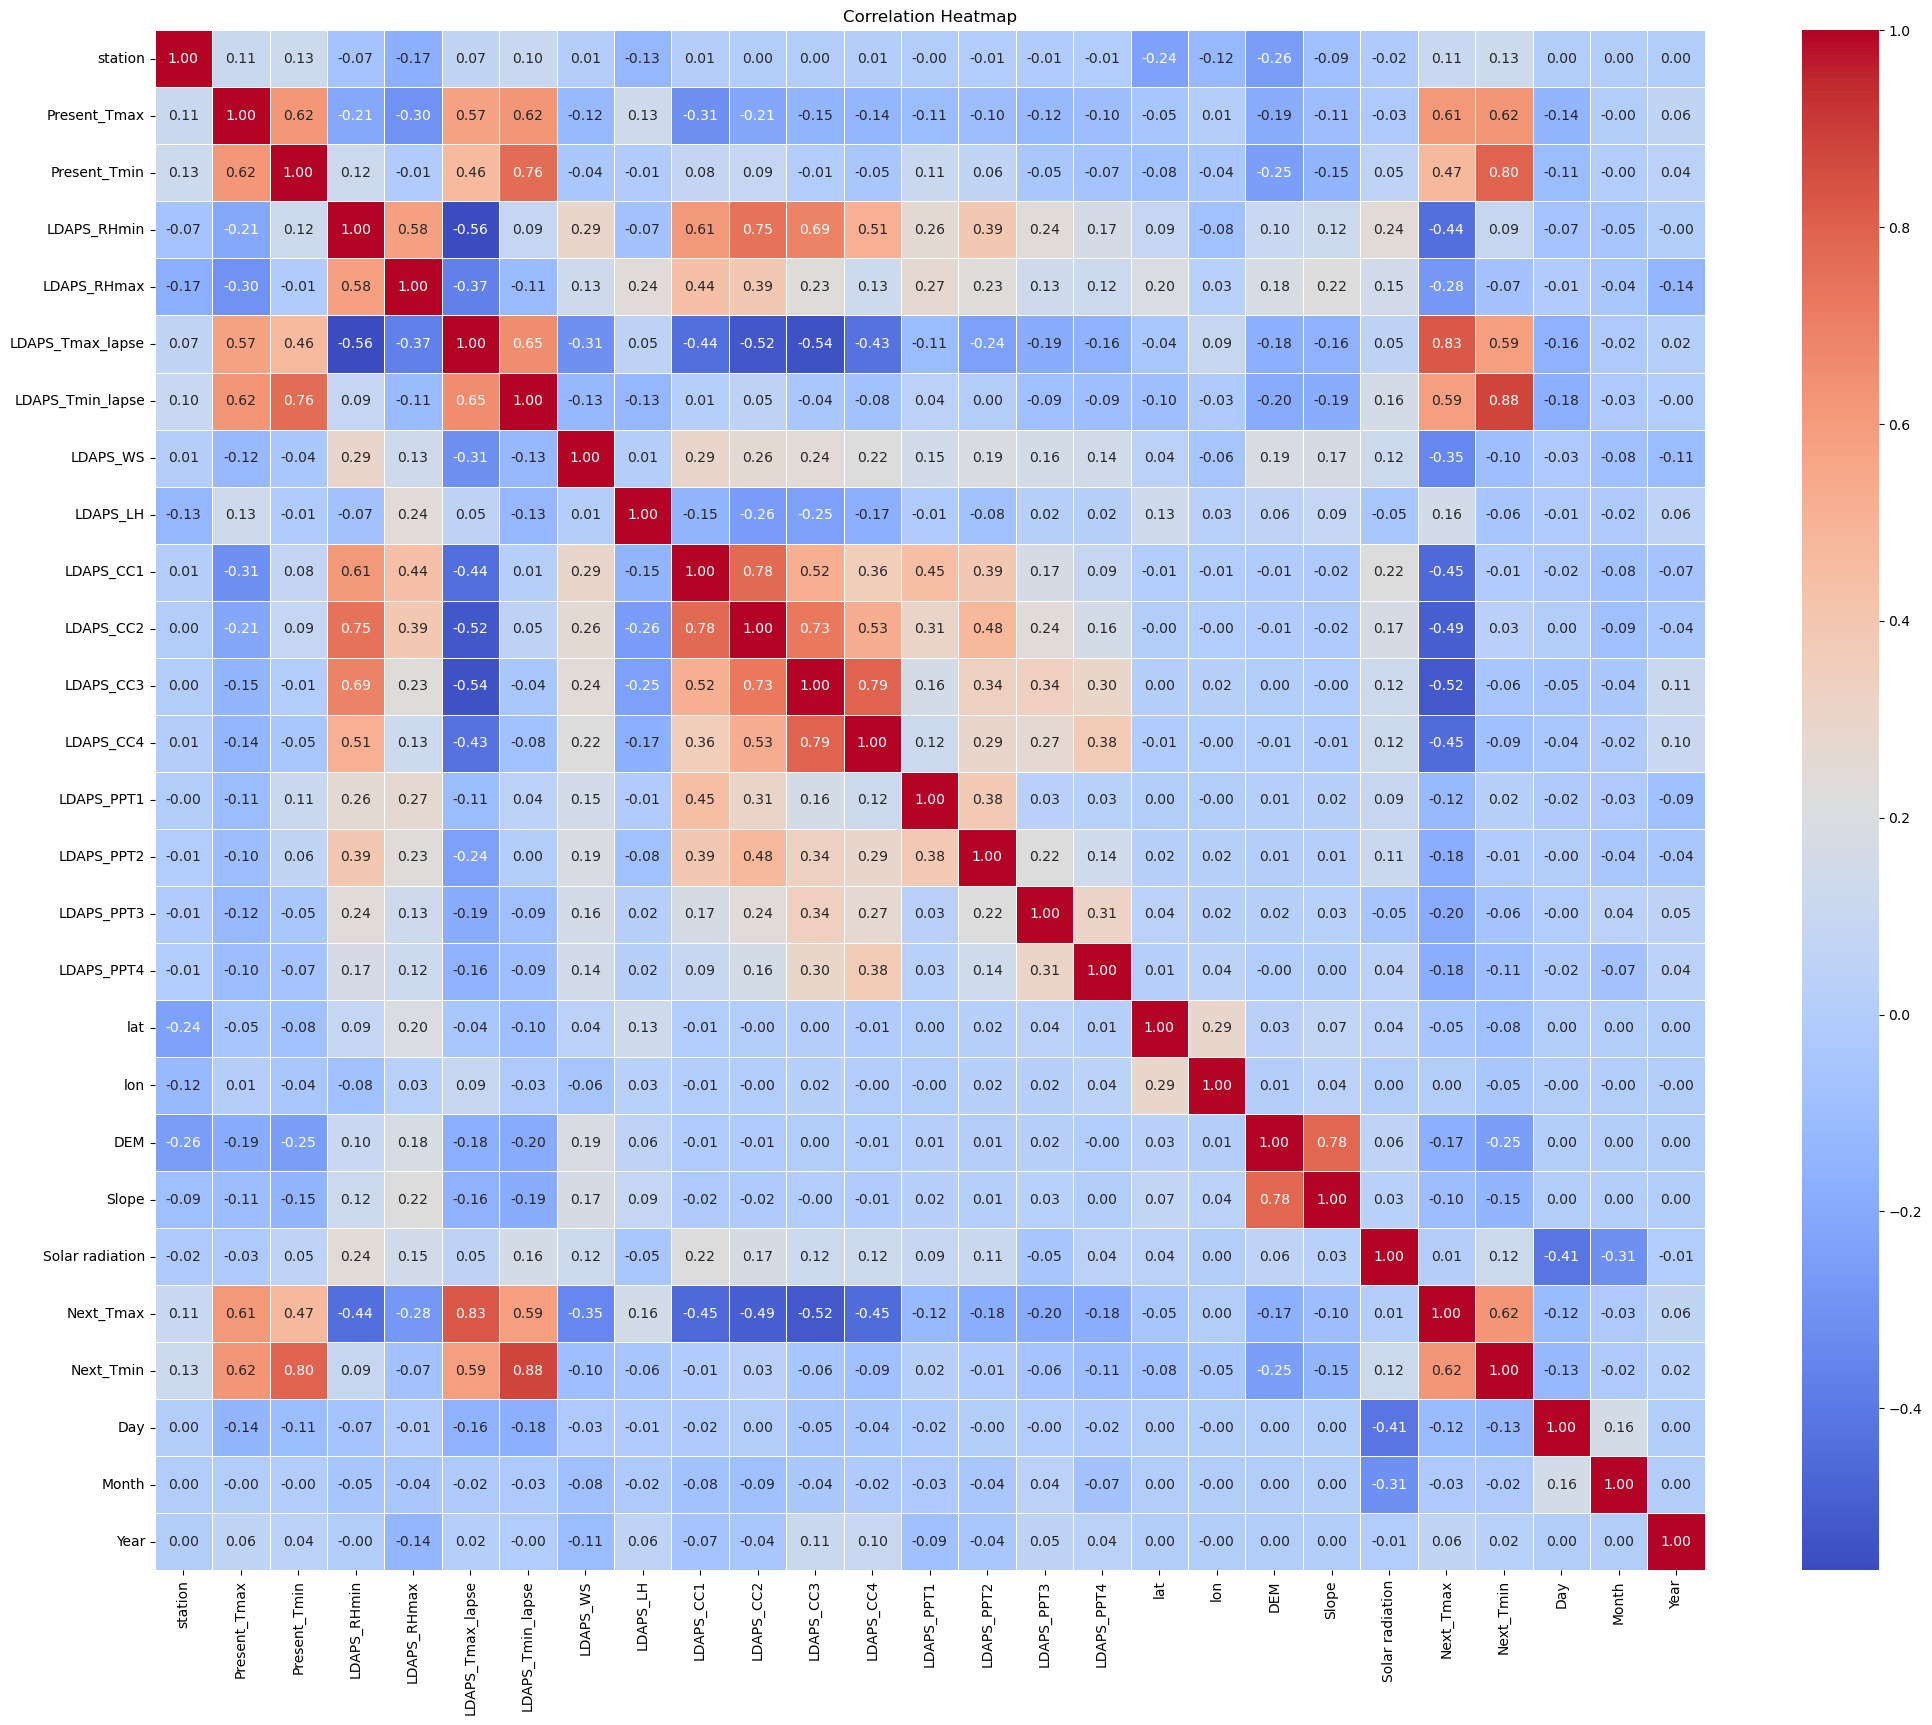

In [12]:
# Checking the correlation matrix


corr_mat = df.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [47]:
df.skew()

station            -0.000100
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

In [13]:
# Dropping the column that does not play any role in our dataset

df.drop(columns = ['lat', 'lon'], axis=1, inplace=True)

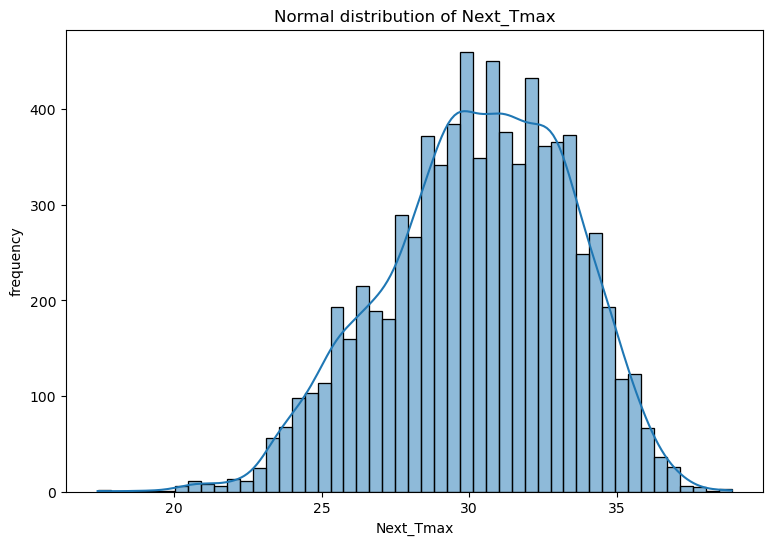

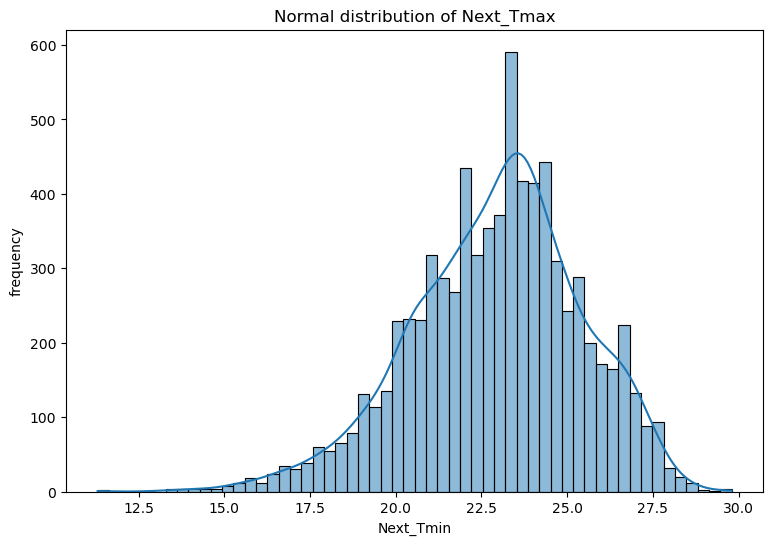

In [32]:
plt.figure(figsize = (9,6))
sns.histplot(df['Next_Tmax'], kde = True)
plt.xlabel('Next_Tmax')
plt.ylabel('frequency')
plt.title('Normal distribution of Next_Tmax')
plt.show()

plt.figure(figsize = (9,6))
sns.histplot(df['Next_Tmin'], kde = True)
plt.xlabel('Next_Tmin')
plt.ylabel('frequency')
plt.title('Normal distribution of Next_Tmax')
plt.show()

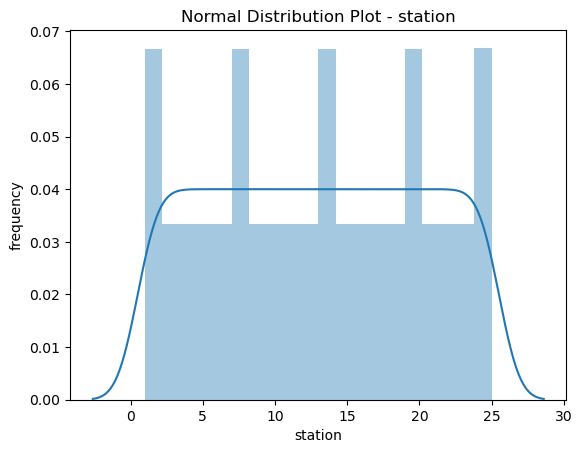

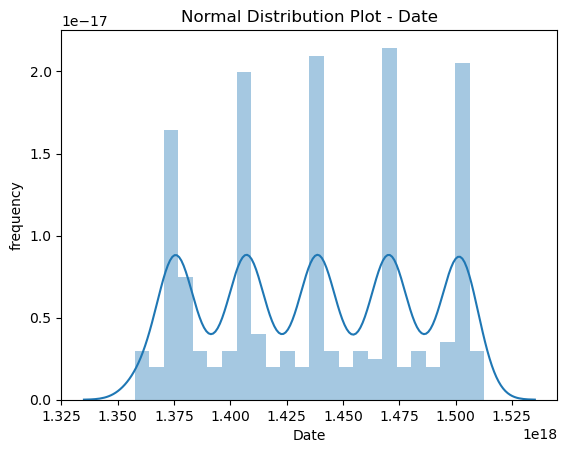

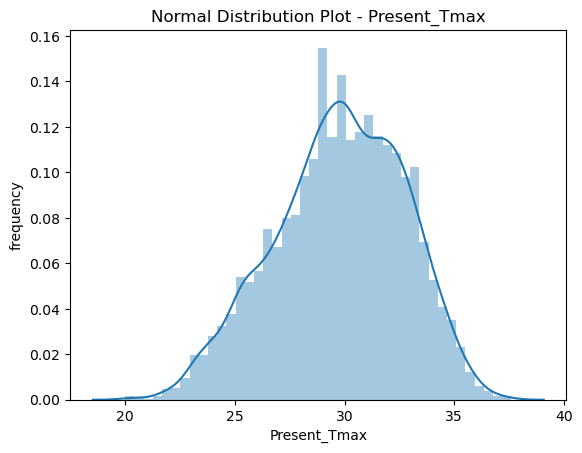

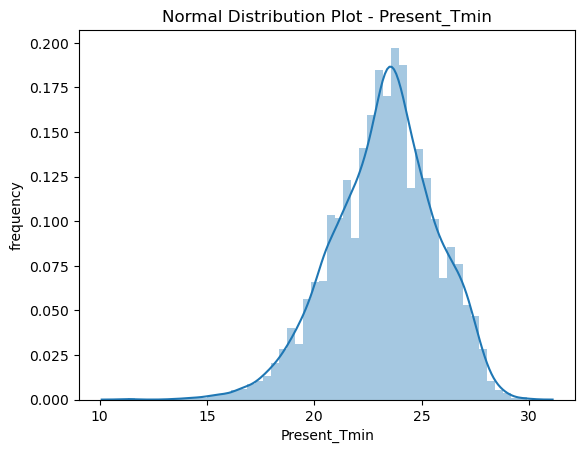

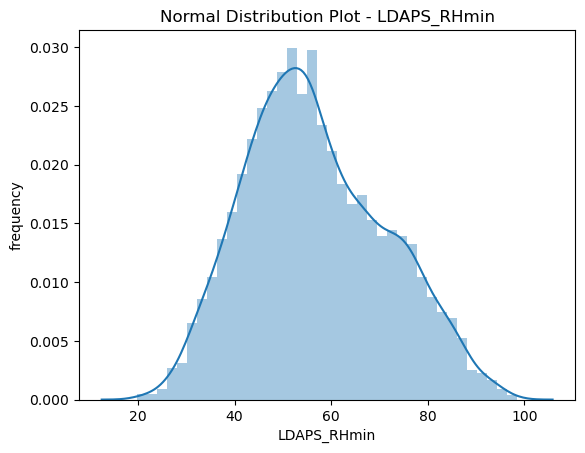

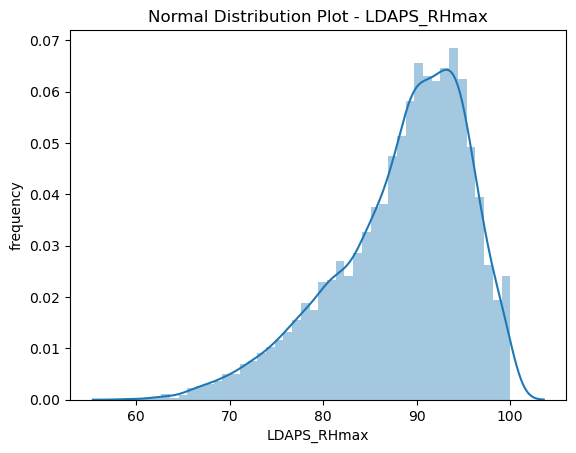

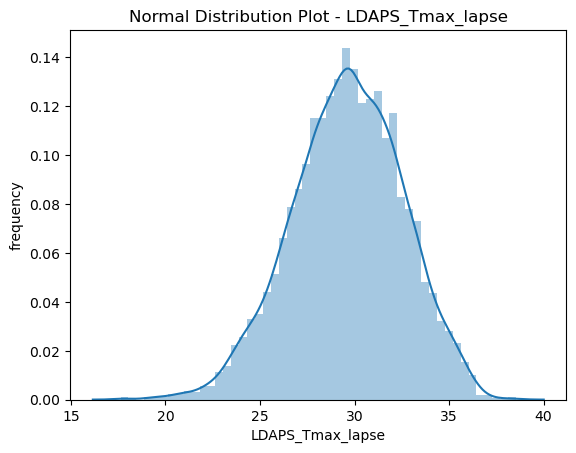

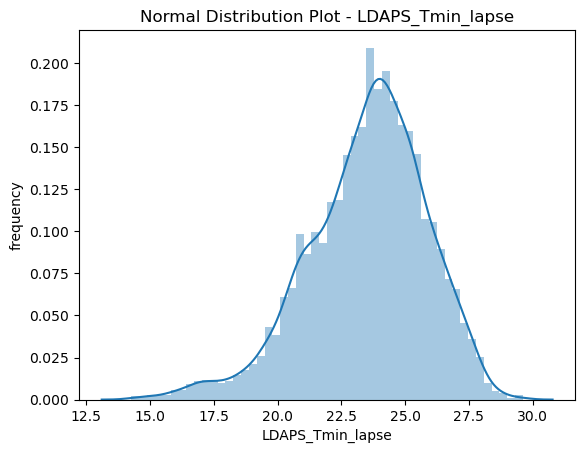

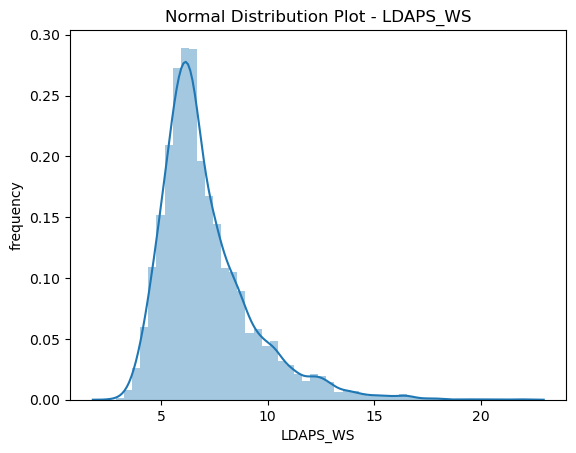

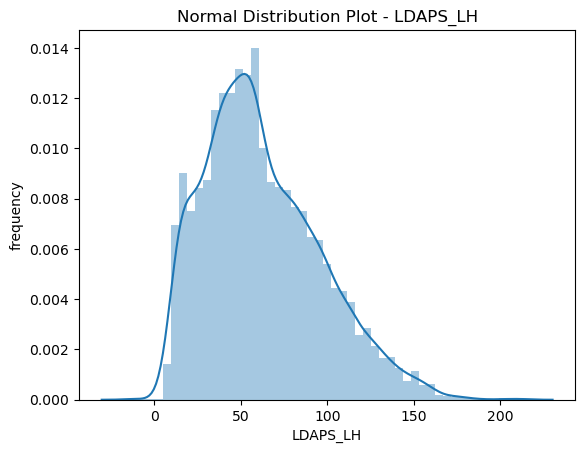

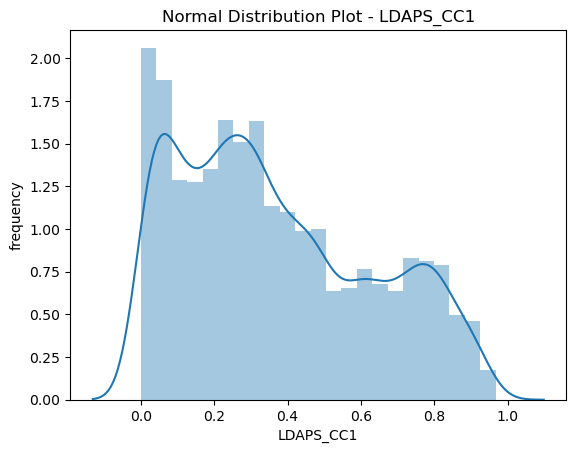

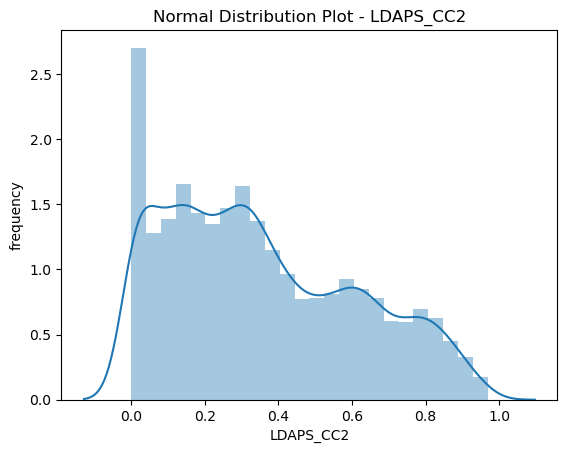

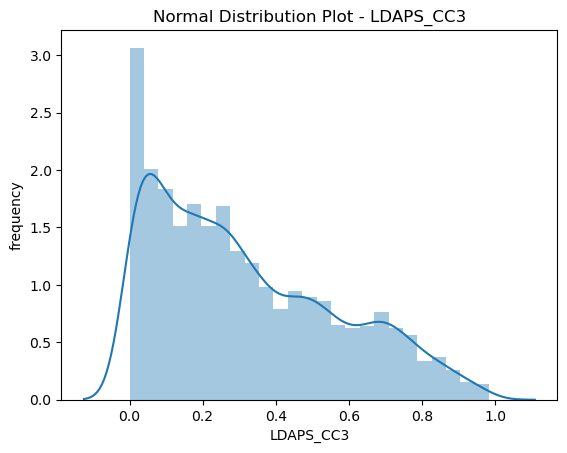

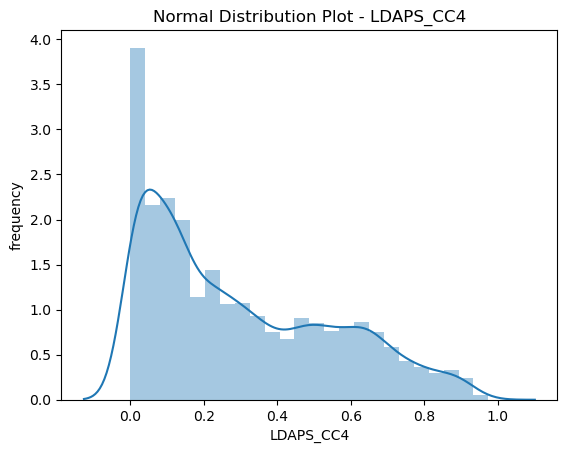

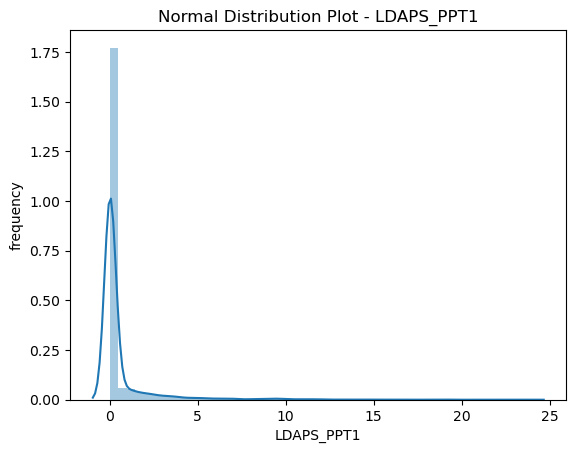

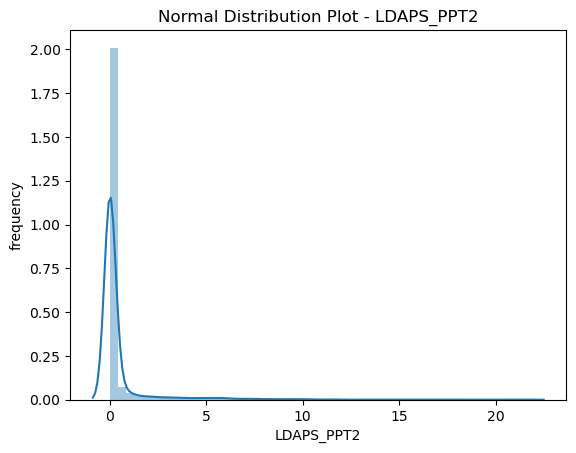

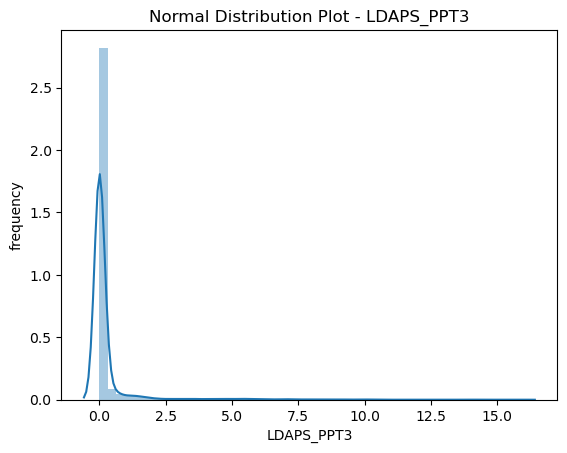

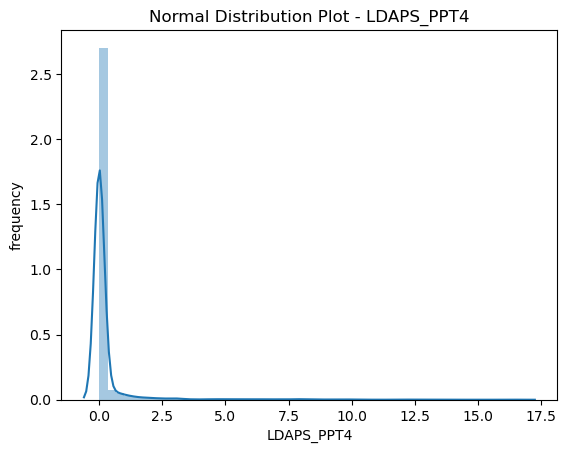

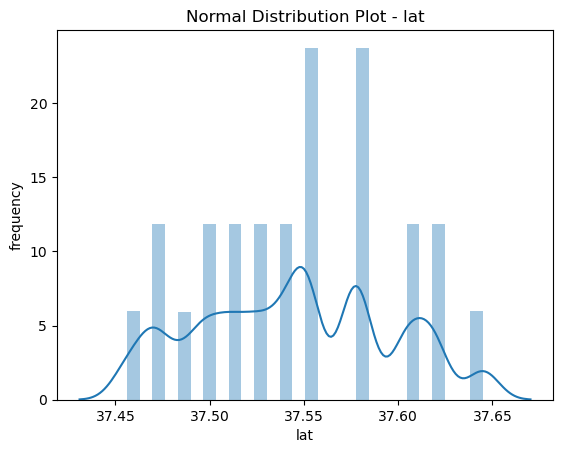

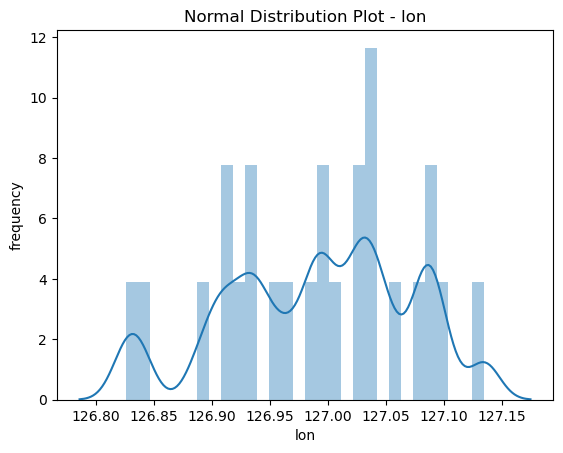

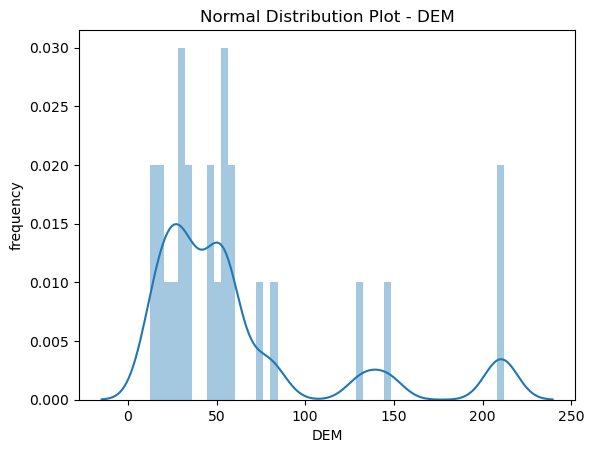

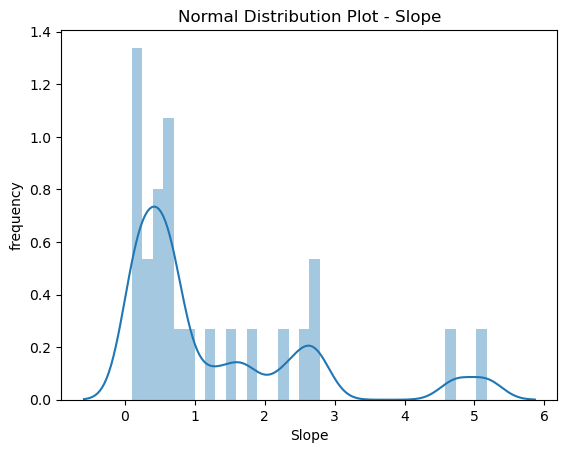

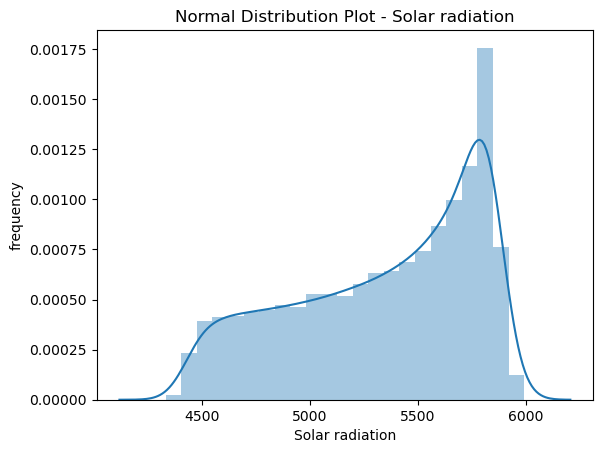

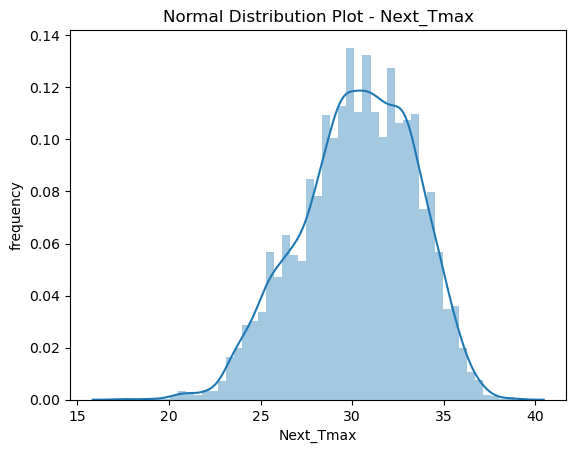

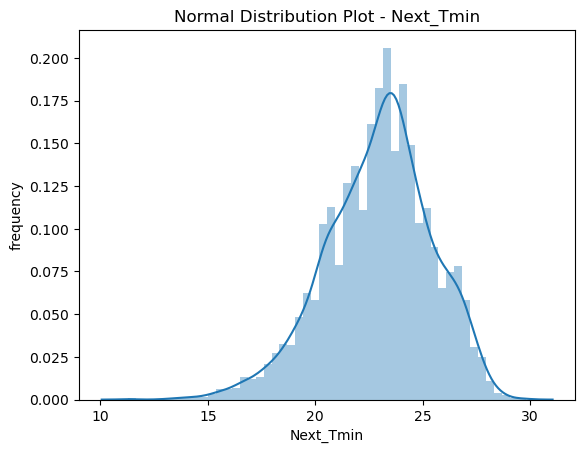

In [49]:
for column in df.columns:
    # Create a figure and axes for the plot
    fig, ax = plt.subplots()
    
    # Plot the distribution using seaborn's distplot
    sns.distplot(df[column], ax=ax)
    
    # Set the plot title and labels
    ax.set_title(f"Normal Distribution Plot - {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("frequency")
    
    # Display the plot
    plt.show()


In [ ]:
#Next t_min is slightly skewed towards right

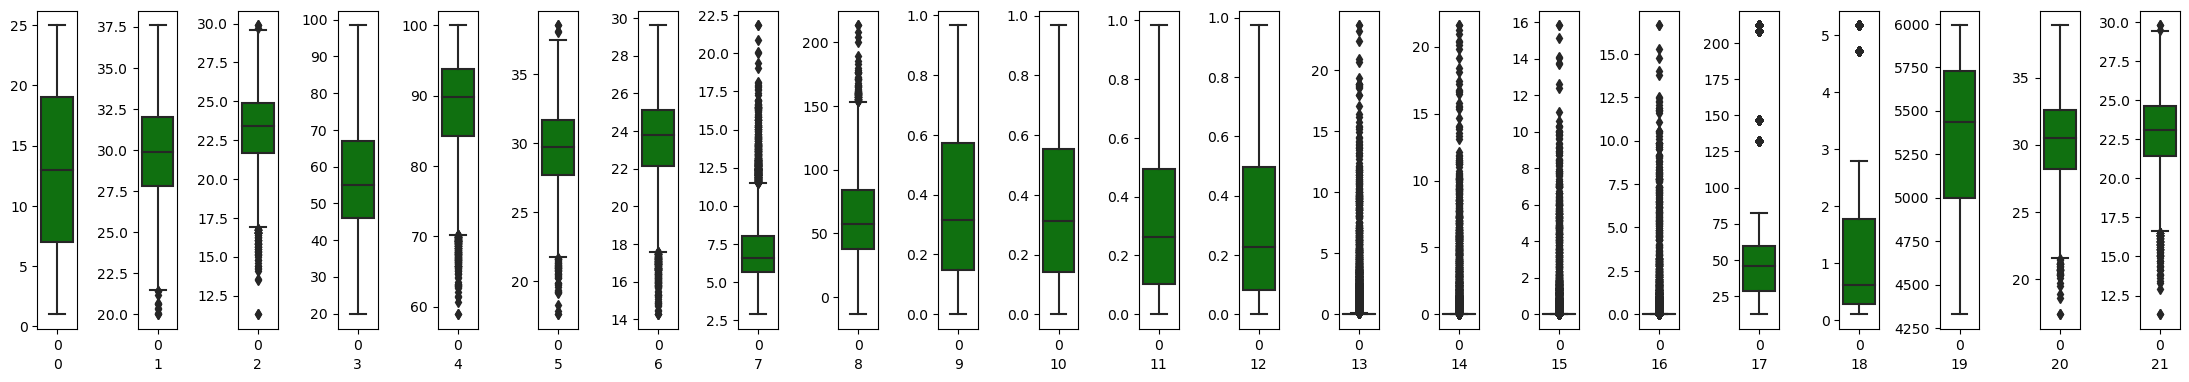

In [14]:
collist = df.columns.values

ncol = 25
nrows = 20

plt.figure(figsize = (ncol, 3*ncol))

for i in range(0, len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(data = df[collist[i]], color = 'green', orient = 'v')
    plt.xlabel(i)
    plt.tight_layout()
    

In [14]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [12]:
from scipy import stats
from scipy.stats import zscore


In [13]:
z_score = zscore(df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation']])

In [14]:
abs_z_score = np.abs(z_score)

In [15]:
filtering_entry = (abs_z_score<3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [18]:
df.head(10)

,index,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,...,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,...,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,...,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,...,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,...,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,...,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
5,5,6.0,2013-06-30,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,...,0.0,0.0,54.6384,0.1457,5873.780762,31.5,24.0,30,6,2013
6,6,7.0,2013-06-30,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,...,0.0,0.0,12.3700,0.0985,5849.233398,30.9,23.4,30,6,2013
7,7,8.0,2013-06-30,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,...,0.0,0.0,52.5180,1.5629,5863.992188,31.1,22.9,30,6,2013
8,8,9.0,2013-06-30,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,...,0.0,0.0,50.9312,0.4125,5876.901367,31.3,21.6,30,6,2013
9,9,10.0,2013-06-30,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,...,0.0,0.0,208.5070,5.1782,5893.608398,30.5,21.0,30,6,2013


# for next day maximum temperature

In [39]:
features = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse',
            'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
            'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Solar radiation']

target = 'Next_Tmax'  

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
random_state_range = range(1, 509)

best_random_state = None
best_r2_score = -1

for random_state in random_state_range:
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=random_state)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    if r2 > best_r2_score:
        best_r2_score = r2
        best_random_state = random_state

print("Best Random State:", best_random_state)
print("Best R2 Score:", best_r2_score)


Best Random State: 413
Best R2 Score: 0.7746850181641107


In [42]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=413)

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


# LINEAR REGRESSSION

In [49]:
lr= LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 1.9615683718267602
Mean Absolute Error (MAE): 1.070347985227908
R-squared (R2): 0.7746850181641107


# DECISION TREE REGRESSOR

In [50]:
dt= DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 1.9638567293777136
Mean Absolute Error (MAE): 1.0352387843704778
R-squared (R2): 0.7744221666380398


# RANODM FOREST REGRESSOR

In [51]:
rf= RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.9022297908827783
Mean Absolute Error (MAE): 0.7195463096960925
R-squared (R2): 0.8963656368728885


# Gradient boost regressor

In [52]:
gb= GradientBoostingRegressor()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 1.347957874657057
Mean Absolute Error (MAE): 0.9030771257282625
R-squared (R2): 0.8451672098683686


# SUPPORT VECTOR

In [34]:
sv= SVR()
sv.fit(X_train, y_train)

y_pred = sv.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 8.369261652746674
Mean Absolute Error (MAE): 2.3349208836451814
R-squared (R2): 0.04040173249315182


# KNEIGHBORS REGRESSOR

In [35]:
knr= KNeighborsRegressor()
knr.fit(X_train, y_train)

y_pred = knr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 4.2201010130246015
Mean Absolute Error (MAE): 1.588292329956585
R-squared (R2): 0.5161339448058384


# EXTRA TREE REGRESSOR

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
et=  ExtraTreesRegressor()
et.fit(X_train, y_train)

y_pred = et.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.7197106237337195
Mean Absolute Error (MAE): 0.6382778581765555
R-squared (R2): 0.9173306480453483


In [54]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # number of trees
    'max_depth': [None, 5, 10],  # maximum depth of the tree
    'min_samples_split': [2, 4, 6],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3]  # minimum number of samples required to be at a leaf node
}

# Instantiate the ExtraTreeRegressor
extra_tree = ExtraTreesRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(extra_tree, param_grid, scoring='r2', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and the R2 score
print("Best Hyperparameters:", best_params)
print("R2 Score:", r2)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R2 Score: 0.9176925872447026


In [55]:

# Instantiate the ExtraTreeRegressor with the best hyperparameters obtained from GridSearchCV
extra_tree = ExtraTreesRegressor(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Train the model using the training data
extra_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = extra_tree.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print("R2 Score:", r2)


R2 Score: 0.9176829542762246


In [76]:
import joblib


model_filename = 'et_max_model'
joblib.dump(extra_tree, model_filename)

['et_max_model']

In [77]:
loaded_model = joblib.load(model_filename)

In [60]:
data = {
    'station': [1, 2, 3, 4, 5],
    'Day' :[12, 23, 21, 18, 30],
    'Month':[6, 6, 6, 5, 4],
    'year':[2013, 2014, 2013, 2013, 2013],
    'Present_Tmax': [32.1, 29.8, 30.5, 31.7, 33.2],
    'Present_Tmin': [25.2, 23.4, 24.1, 25.8, 27.3],
    'LDAPS_RHmin': [87.2, 81.5, 89.6, 76.3, 80.7],
    'LDAPS_RHmax': [99.1, 95.6, 97.3, 90.5, 94.8],
    'LDAPS_Tmax_lapse': [25.3, 23.1, 24.9, 26.8, 27.9],
    'LDAPS_Tmin_lapse': [21.8, 19.7, 22.5, 24.2, 25.5],
    'LDAPS_WS': [5.2, 4.8, 5.9, 6.4, 4.9],
    'LDAPS_LH': [134.1, 117.6, 142.8, 153.2, 126.7],
    'LDAPS_CC1': [0.24, 0.21, 0.19, 0.15, 0.18],
    'LDAPS_CC2': [0.29, 0.26, 0.23, 0.17, 0.22],
    'LDAPS_CC3': [0.08, 0.11, 0.13, 0.12, 0.09],
    'LDAPS_CC4': [0.12, 0.09, 0.07, 0.08, 0.11],
    'LDAPS_PPT1': [0.0, 0.1, 0.2, 0.0, 0.1],
    'LDAPS_PPT2': [0.0, 0.0, 0.1, 0.0, 0.0],
    'LDAPS_PPT3': [0.0, 0.0, 0.0, 0.0, 0.1],
    'LDAPS_PPT4': [0.0, 0.0, 0.0, 0.0, 0.0],
    'DEM': [103.3, 206.7, 152.2, 92.5, 198.8],
    'Slope': [1.2, 0.9, 1.5, 0.8, 1.0],
    'Solar radiation': [5439.2, 4691.3, 5102.6, 5278.8, 4921.9],
    'Next_Tmax': [33.6, 31.2, 32.1, 33.4, 34.8],
    'Next_Tmin': [24.3, 22.6, 24.8, 25.1, 27.0]}




In [ ]:
new_data_predictions = loaded_model.predict(new_data)

# Display the predictions for the new data
print(new_data_predictions)

# for minimum temperature

In [62]:
features = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse',
            'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
            'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Solar radiation']

target2 = 'Next_Tmin'  # or 'Next_Tmin' for the minimum temperature model


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
random_state_range = range(1, 509)

best_random_state = None
best_r2_score = -1

for random_state in random_state_range:
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target2], test_size=0.2, random_state=random_state)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    if r2 > best_r2_score:
        best_r2_score = r2
        best_random_state = random_state

print("Best Random State:", best_random_state)
print("Best R2 Score:", best_r2_score)


Best Random State: 347
Best R2 Score: 0.8389786761290674


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [66]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=347)

# linear regression

In [67]:
lr= LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 2.3021466110344444
Mean Absolute Error (MAE): 1.1391364511693827
R-squared (R2): 0.7378669395432673


# decesion tree

In [68]:
dt= DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 2.478270622286541
Mean Absolute Error (MAE): 1.0870477568740955
R-squared (R2): 0.7178126450564869


# random forest classifier

In [69]:
rf= RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 1.1060411396526777
Mean Absolute Error (MAE): 0.7639124457308253
R-squared (R2): 0.8740610404487088


# gradient boosting regressor

In [70]:
gb= GradientBoostingRegressor()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 1.6351073649017906
Mean Absolute Error (MAE): 0.9759734962678315
R-squared (R2): 0.8138191131343906


# support vector

In [71]:
sv= SVR()
sv.fit(X_train, y_train)

y_pred = sv.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 8.410356997711837
Mean Absolute Error (MAE): 2.3504015353773853
R-squared (R2): 0.04235785471835152


# K neighbors regressor

In [72]:
knr= KNeighborsRegressor()
knr.fit(X_train, y_train)

y_pred = knr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 4.388578581765557
Mean Absolute Error (MAE): 1.61410998552822
R-squared (R2): 0.500296145701964


# extra tree regressor

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
et=  ExtraTreesRegressor()
et.fit(X_train, y_train)

y_pred = et.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.8675697945007249
Mean Absolute Error (MAE): 0.6821403762662817
R-squared (R2): 0.9012144907269369


In [74]:

# Instantiate the ExtraTreeRegressor with the best hyperparameters obtained from GridSearchCV
extra_tree = ExtraTreesRegressor(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Train the model using the training data
extra_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = extra_tree.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print("R2 Score:", r2)

R2 Score: 0.9013795468728072


In [81]:
import joblib


model_filename = 'et_max_model2'
joblib.dump(extra_tree, model_filename)

['et_max_model2']